### Import Libraries

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
from matplotlib.pyplot import figure
from math import sqrt
import warnings 
warnings.filterwarnings('ignore')

### Load the Data

In [74]:
df = pd.read_csv("appliance_energy_usage.csv")

### EDA

In [75]:
df.head()

,date,Appliances,lights,T_out,Press_mm_hg,RH_out,Windspeed,Tdewpoint,Visibility
0,1/11/2016 17:00,60,30,6.600000,733.5,92.0,7.000000,5.3,63.000000
1,1/11/2016 17:10,60,30,6.483333,733.6,92.0,6.666667,5.2,59.166667
2,1/11/2016 17:20,50,30,6.366667,733.7,92.0,6.333333,5.1,55.333333
3,1/11/2016 17:30,50,40,6.250000,733.8,92.0,6.000000,5.0,51.500000
4,1/11/2016 17:40,60,40,6.133333,733.9,92.0,5.666667,4.9,47.666667


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T_out        19735 non-null  float64
 4   Press_mm_hg  19735 non-null  float64
 5   RH_out       19735 non-null  float64
 6   Windspeed    19735 non-null  float64
 7   Tdewpoint    19735 non-null  float64
 8   Visibility   19735 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.4+ MB


In [102]:
df.dtypes

date            object
Appliances     float64
lights         float64
T_out          float64
Press_mm_hg    float64
RH_out         float64
Windspeed      float64
Tdewpoint      float64
Visibility     float64
dtype: object

In [98]:
df.Appliances=df.Appliances.astype('float')

In [101]:
df.lights=df.lights.astype('float')

In [78]:
df.isnull().sum()

date           0
Appliances     0
lights         0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Tdewpoint      0
Visibility     0
dtype: int64

In [79]:
df_final=df.loc[:,['date','lights']]

In [80]:
df_final.head()

,date,lights
0,1/11/2016 17:00,30
1,1/11/2016 17:10,30
2,1/11/2016 17:20,30
3,1/11/2016 17:30,40
4,1/11/2016 17:40,40


In [81]:
df_final['date'] = pd.to_datetime(df_final['date'])

In [82]:
df_final.dtypes

date      datetime64[ns]
lights             int64
dtype: object

In [83]:
df_final=df_final.set_index('date')

In [84]:
df_final.index

DatetimeIndex(['2016-01-11 17:00:00', '2016-01-11 17:10:00',
               '2016-01-11 17:20:00', '2016-01-11 17:30:00',
               '2016-01-11 17:40:00', '2016-01-11 17:50:00',
               '2016-01-11 18:00:00', '2016-01-11 18:10:00',
               '2016-01-11 18:20:00', '2016-01-11 18:30:00',
               ...
               '2016-05-27 16:30:00', '2016-05-27 16:40:00',
               '2016-05-27 16:50:00', '2016-05-27 17:00:00',
               '2016-05-27 17:10:00', '2016-05-27 17:20:00',
               '2016-05-27 17:30:00', '2016-05-27 17:40:00',
               '2016-05-27 17:50:00', '2016-05-27 18:00:00'],
              dtype='datetime64[ns]', name='date', length=19735, freq=None)

In [85]:
df_final.head()

,lights
date,
2016-01-11 17:00:00,30
2016-01-11 17:10:00,30
2016-01-11 17:20:00,30
2016-01-11 17:30:00,40
2016-01-11 17:40:00,40


In [86]:
df_final=df_final.resample('1H').mean()
#df_final=df_final.resample('D').mean()

In [87]:
df_final.head()

,lights
date,
2016-01-11 17:00:00,35.000000
2016-01-11 18:00:00,51.666667
2016-01-11 19:00:00,25.000000
2016-01-11 20:00:00,35.000000
2016-01-11 21:00:00,23.333333


### Plot the data

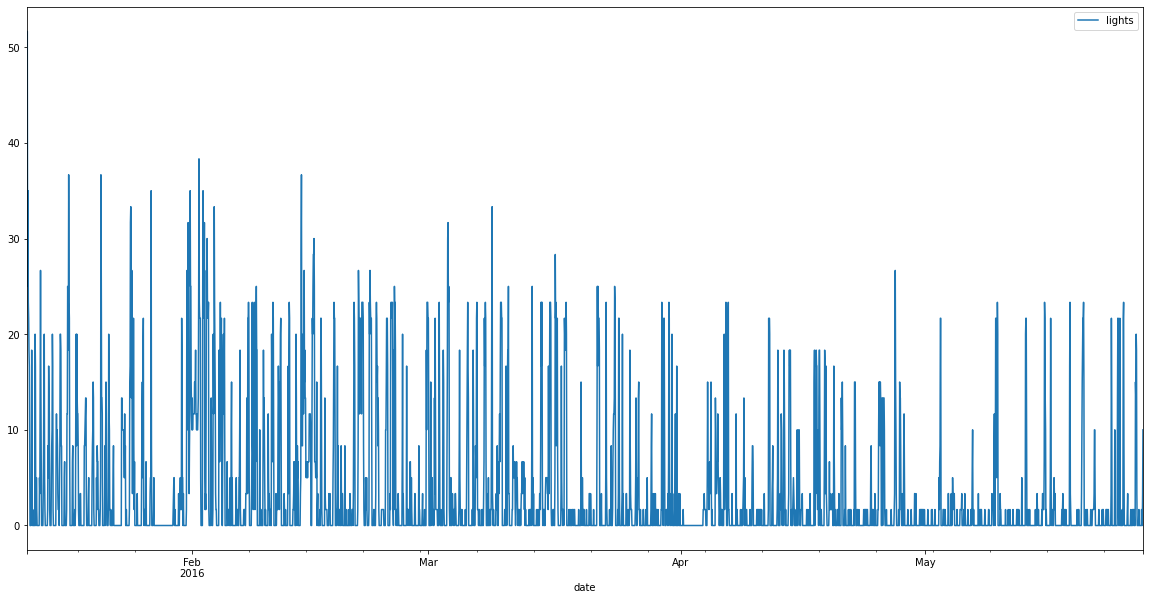

In [88]:
#df_final[0:720].plot(figsize=(20,10))
df_final.plot(figsize=(20,10))
plt.show()

### Null Hypothesis - Series possesses a unit root and hence is not stationary

### Alternate Hypothesis - Series is stationary

In [89]:
def adfuller_test(series):
    result=adfuller(series)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [90]:
adfuller_test(df_final['lights'])

ADF Test Statistic : -7.114022600801061
p-value : 3.8726478913181646e-10
#Lags Used : 27
Number of Observations Used : 3262
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [91]:
print("Length of the dataset is {} Rows".format(len(df_final['lights'])))

Length of the dataset is 3290 Rows


### Train / Test Split

In [92]:
X = df_final['lights'].values
train = X[0:3200] # 3000 data as train data
test  = X[3200:]  # 290 data as test data
predictions = []

print('Full Data Size     :',X.size)
print('Training Data Size :',train.size)
print('Testing Data Size  :',test.size)

Full Data Size     : 3290
Training Data Size : 3200
Testing Data Size  : 90


In [93]:
# train=df_final[df_final.index<='2016-05-25 00:00:00']
# test=df_final[df_final.index>='2016-05-25 01:00:00']

In [94]:
# fig,ax=plt.subplots(figsize=(15,5))
# train.plot(ax=ax,label='Training Set',title='Train/Test Split')
# test.plot(ax=ax,label='Test Set')
# ax.axvline('2016-05-25',color='black',ls='--')
# ax.legend(['Training Set','Test Set'])
# plt.show()

In [95]:
print('Training Data Size :',train.size)
print('Testing Data Size  :',test.size)

Training Data Size : 3200
Testing Data Size  : 90


In [104]:
df.columns

Index(['date', 'Appliances', 'lights', 'T_out', 'Press_mm_hg', 'RH_out',
       'Windspeed', 'Tdewpoint', 'Visibility'],
      dtype='object')

### Plot ACF

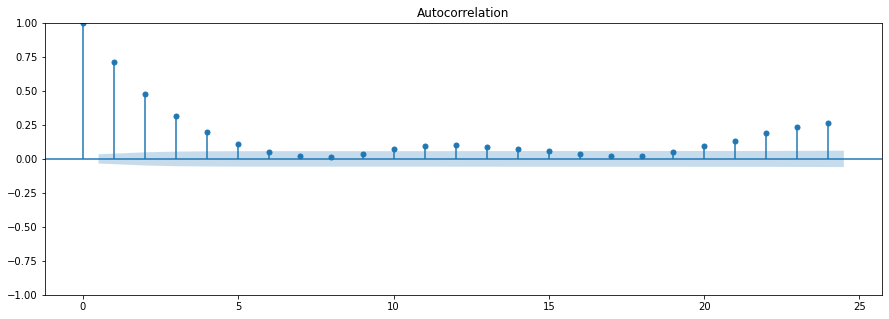

In [51]:
plt.rc("figure", figsize=(15,5))
plot_acf(df_final['lights'],lags=24)
plt.show()

### Plot PACF

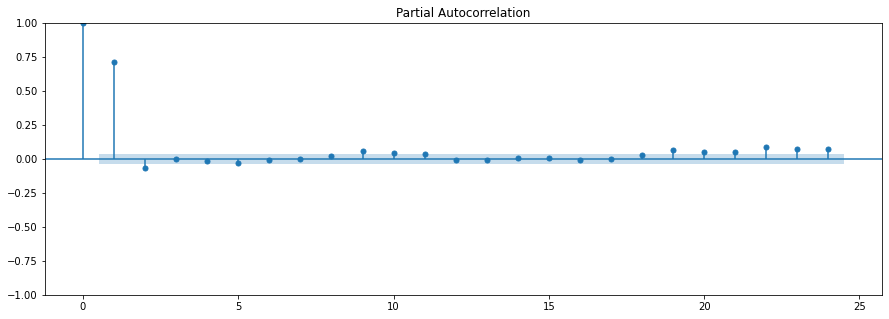

In [109]:
plt.rc("figure", figsize=(15,5))
plot_pacf(df_final['lights'], lags=24,method='ywm')
plt.show()

In [26]:
# grid search ARIMA parameters for time series


def evaluate_arima_model(X, arima_order):
	# prepare training dataset
	train_size = int(len(X) * 0.95)
	train, test = X[0:train_size], X[train_size:]
	history = [x for x in train]
	# make predictions
	predictions = list()
	for t in range(len(test)):
		model = ARIMA(history, order=arima_order)
		model_fit = model.fit()
		yhat = model_fit.forecast()[0]
		predictions.append(yhat)
		history.append(test[t])
	# calculate out of sample error
	rmse = sqrt(mean_squared_error(test, predictions))
	return rmse
 # evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
	dataset = dataset.astype('float32')
	best_score, best_cfg = float("inf"), None
	for p in p_values:
		for d in d_values:
			for q in q_values:
				order = (p,d,q)
				try:
					rmse = evaluate_arima_model(dataset, order)
					if rmse < best_score:
						best_score, best_cfg = rmse, order
					print('ARIMA%s RMSE=%.3f' % (order,rmse))
				except:
					continue
	print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [27]:
# evaluate parameters
p_values = [1,2,5] 
d_values = range(0,1)
q_values = [1,2,3]#range(0, 3)

# evaluate_models(df_final['lights'], p_values, d_values, q_values)

# ARIMA(1, 0, 1) RMSE=4.169
# ARIMA(1, 0, 2) RMSE=4.172
# ARIMA(1, 0, 3) RMSE=4.176
# ARIMA(2, 0, 1) RMSE=4.189
# ARIMA(2, 0, 2) RMSE=4.172
# ARIMA(2, 0, 3) RMSE=4.193
# ARIMA(5, 0, 1) RMSE=4.201
# ARIMA(5, 0, 2) RMSE=4.200

### ARIMA Model creation

In [61]:
#p,d,q  
#p = periods taken for autoregressive model
#d -> Integrated order, difference
# q periods in moving average model
model_arima = ARIMA(train,order=(19,0,10))
model_arima_fit = model_arima.fit()
print(model_arima_fit.summary())  

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 3200
Model:               ARIMA(19, 0, 10)   Log Likelihood               -9525.533
Date:                Thu, 27 Oct 2022   AIC                          19113.066
Time:                        17:56:22   BIC                          19301.264
Sample:                             0   HQIC                         19180.538
                               - 3200                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.8999      1.939      2.011      0.044       0.099       7.701
ar.L1         -0.1467      1.368     -0.107      0.915      -2.827       2.534
ar.L2         -0.4698      0.789     -0.596      0.5

### Prediction 

In [62]:
predict = model_arima_fit.get_prediction(start=len(train),end=len(train) + len(test)-1)

predictions=pd.DataFrame(predict.predicted_mean)

In [63]:
predictions=predictions.rename(columns={0:'predicted_mean'})
predictions.head(10)

,predicted_mean
0,0.808179
1,0.567314
2,0.390756
3,0.439373
4,0.374165
5,1.321764
6,2.219125
7,2.905750
8,3.164358
9,2.419850


In [64]:
test_data=pd.DataFrame(test,columns=['lights'])
test_data.head(10)

,lights
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
5,0.0
6,10.0
7,0.0
8,0.0
9,0.0


### Test and Prediction Compare

<Figure size 2016x504 with 0 Axes>

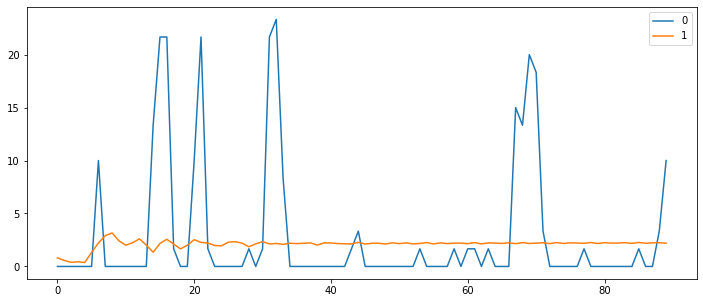

In [65]:
test_vs_pred=pd.concat([test_data['lights'],predictions['predicted_mean']],axis=1,ignore_index=True)

plt.figure(figsize=(28,7))
fig = plt.figure(1)
test_vs_pred.plot(figsize=(12,5))
plt.show()


### Residual Plot to verify white noise

<AxesSubplot:>

<Figure size 2016x504 with 0 Axes>

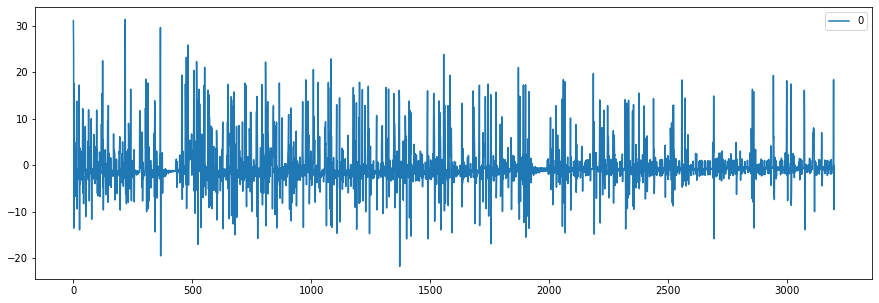

In [66]:
#Residual Plot to verify white noise

residuals=pd.DataFrame(model_arima_fit.resid)
plt.figure(figsize=(28,7))
residuals.plot()

### Checking for test and prediction performance

In [67]:
rmse = sqrt(mean_squared_error(test_data, predictions))
print('RMSE :',rmse)#RMSE : 5.182559699991877

RMSE : 6.1977658876950805


In [68]:
test_vs_pred.rename({0:'Actual',1:'predicted_mean'},inplace=True,axis=1)
test_vs_pred.head(100)

,Actual,predicted_mean
0,0.000000,0.808179
1,0.000000,0.567314
2,0.000000,0.390756
3,0.000000,0.439373
4,0.000000,0.374165
...,...,...
85,1.666667,2.263613
86,0.000000,2.189915
87,0.000000,2.230713
88,3.333333,2.239000
